# 様々な空間フィルタ
## (1) 平均化フィルタ
* 画像を平滑化ーー画像ノイズの低減
* カーネルサイズを大きくすると平滑化の効果が大きくなる

In [6]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [40]:
av_filter = np.ones((3,3))/9
av_filter

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

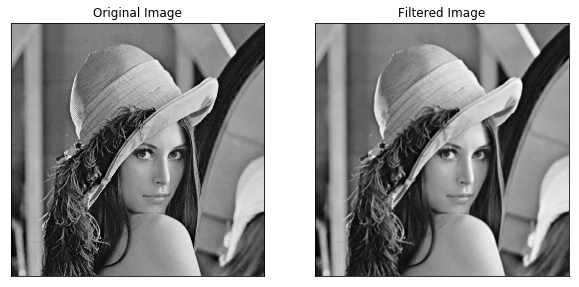

In [41]:
img = cv2.imread('Figs/lenna.png',0)
# cv2.filter2Dが、フィルタ適用のための関数(第２引数の-1はピクセル深度を入力と一致させるためのもの)
img_out = cv2.filter2D(img,-1,av_filter) 

plt.figure(figsize=(10,7))
# 原画像とフィルタをかけた画像の２つを並べて見比べる
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_out,cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.show()

OpenCVにはcv2.blur() と cv2.boxFilter() が用意されている。したがって、今の
```
img_out = cv2.filter2D(img,-1,av_filter) 
```
は以下で置き換えられる((3,3)がカーネルサイズ）。
```
img_out = cv2.blur(img, (3,3))
```

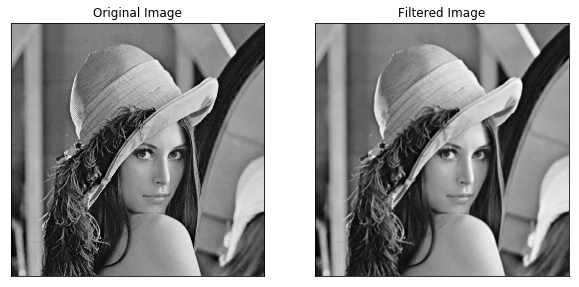

In [39]:
img = cv2.imread('Figs/lenna.png',0)
# cv2.blurを用いる
img_out = cv2.blur(img, (3,3))

plt.figure(figsize=(10,7))
# 原画像とフィルタをかけた画像の２つを並べて見比べる
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_out,cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.show()

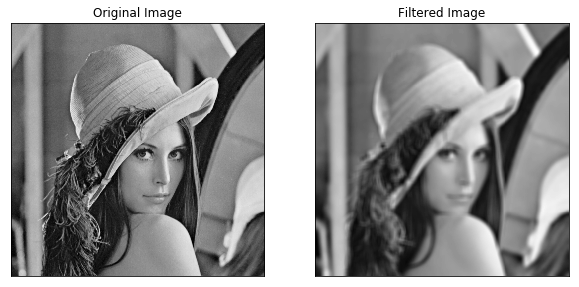

In [42]:
# ややボケた感じがするものの、違いがよくわからないので、カーネルサイズを大きくしてみる
n=10
av_filter = np.ones((n,n))/(n*n)

img_out = cv2.filter2D(img,-1,av_filter)
plt.figure(figsize=(10,7))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_out,cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.show()

## (2) ガウシアンフィルタ(Gaussian filter):

各画素の重みを調整、特に注目画素の重みを最大、そこから遠い画素ほど重みを小さくする加重平均

$G(x,y,\sigma) = \frac{1}{2\pi\sigma^2} \exp(-\frac{x^2+y^2}{2\sigma^2})$

$\sigma$はスケールといい、平滑化の範囲を決めるパラメタ（大きいほど平滑化される）

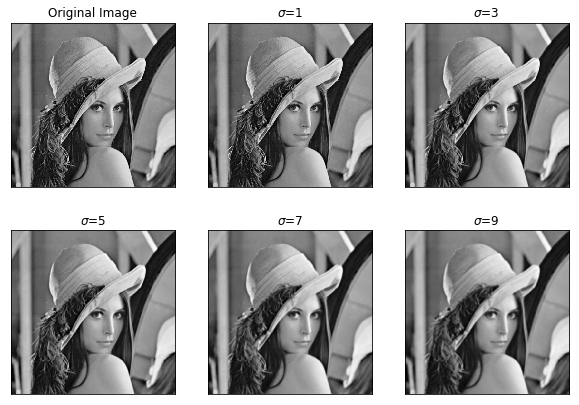

In [43]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Figs/lenna.png',0)

plt.figure(figsize=(10,7))
# 原画像とカーネルサイズを変えたフィルタをかけた画像を並べて見比べる
plt.subplot(231),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
for i in range(5):
    s=2*i+1
    img_out = cv2.GaussianBlur(img,(s,s),0)
    plt.subplot(232+i),plt.imshow(img_out,cmap = 'gray')
    plt.title('$\sigma$='+str(s)), plt.xticks([]), plt.yticks([])
plt.show()

## (3) 中央値フィルタ

ごま塩ノイズのようなノイズに対して効果的である．平均化フィルタとガウシアンフィルタの出力が原画像中には存在しないような画素値を出力するのに対し，中央値フィルタの出力は常に原画像中から選ばれる．そのためごま塩ノイズのような特異なノイズに対して効果的である．ここでカーネルサイズは奇数でなければならない．

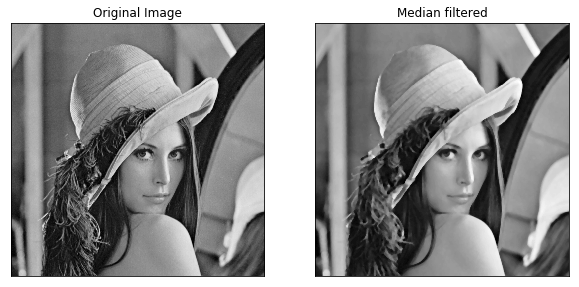

In [47]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Figs/lenna.png',0)

plt.figure(figsize=(10,7))
# 原画像とカーネルサイズを変えたフィルタをかけた画像を並べて見比べる
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

img_out = cv2.medianBlur(img,5)
plt.subplot(122),plt.imshow(img_out,cmap = 'gray')
plt.title('Median filtered'), plt.xticks([]), plt.yticks([])
plt.show()


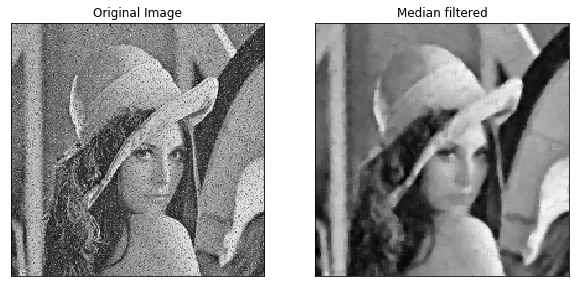

In [51]:
# ごま塩ノイズの画像に対して
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Figs/lennaSalted.png',0)

plt.figure(figsize=(10,7))
# 原画像とカーネルサイズを変えたフィルタをかけた画像を並べて見比べる
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

img_out = cv2.medianBlur(img,5)
plt.subplot(122),plt.imshow(img_out,cmap = 'gray')
plt.title('Median filtered'), plt.xticks([]), plt.yticks([])
plt.show()


## (4) バイラテラルフィルタ(bilateral filter): エッジ情報を保持しつつ平滑化を行う

	注目画素からの距離に加えて、輝度値の差による重み付けを行う
    バイラテラルフィルタはガウシアンフィルタを採用しているが，画素値の差を考慮した関数として別のガウシアンフィルタも同時に使用する．一つ目のガウシアンフィルタでは、フィルタリングに使用する画素は ‘空間的に近い位置にある’ことを保証している．一方で，二つ目のガウシアンフィルタは、注目画素に似た画素値を持つ画素の値のみ考慮してフィルタリングすることを保証する．その結果、バイラテラルフィルタはエッジを保存した画像のぼかしを実現できることになる．

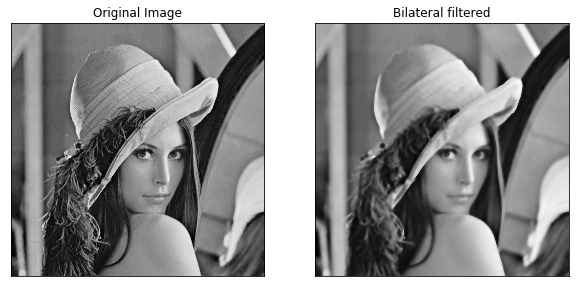

In [54]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Figs/lenna.png',0)

plt.figure(figsize=(10,7))
# 原画像とカーネルサイズを変えたフィルタをかけた画像を並べて見比べる
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# cv2.bilateralFilterがその関数
# 第２引数はフィルタに用いられる周辺画素数に関係（カバーする円の直径）、第３は輝度のσ、第４は距離のσ
img_out = cv2.bilateralFilter(img,9,75,75)
plt.subplot(122),plt.imshow(img_out,cmap = 'gray')
plt.title('Bilateral filtered'), plt.xticks([]), plt.yticks([])
plt.show()

ガウシアンとバイラテラルフィルタの比較(ガウシアンの$\sigma=3.0$, バイラテラルフィルタの定義域$\sigma=3.0$, 値域$\sigma=1$)

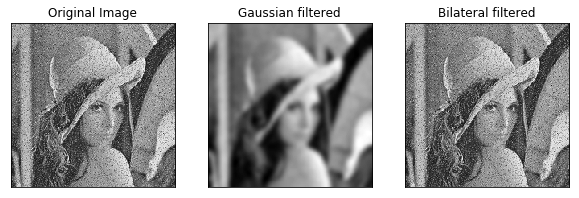

In [63]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Figs/lennaSalted.png',0)

plt.figure(figsize=(10,7))
# 原画像とカーネルサイズを変えたフィルタをかけた画像を並べて見比べる
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

gaussian = cv2.GaussianBlur(img,(0,0),3,3) # sigma_x = sigma_y = 3
plt.subplot(132),plt.imshow(gaussian,cmap = 'gray')
plt.title('Gaussian filtered'), plt.xticks([]), plt.yticks([])

img_out = cv2.bilateralFilter(img,0,1,5)
plt.subplot(133),plt.imshow(img_out,cmap = 'gray')
plt.title('Bilateral filtered'), plt.xticks([]), plt.yticks([])
plt.show()